# Libraries and previous code

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.axes as axs

In [2]:
df_purchase = pd.read_csv("purchase data.csv")

scaler = pickle.load(open('scaler.pickle', 'rb'))

pca = pickle.load(open('pca.pickle', 'rb'))

kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

In [3]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
# transforming the new feature data 
df_purchase_segm_std = scaler.transform(features)

# using PCA model from before
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

# Price Elasticity of Purchase Quantity

In [4]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,0,0,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,0,0,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,3,0,0,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,3,0,0,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,3,0,0,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,3,0,0,0,1


In [5]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')

In [8]:
df_purchase_quantity['Segment_2']

array([0, 1], dtype=uint8)

In [9]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1']+
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2']+
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3']+
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4']+
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'])

In [10]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1']+
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2']+
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3']+
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4']+
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'])

## Model Estimation and Linear Regression

In [25]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]

In [26]:
Y = df_purchase_quantity['Quantity']

In [27]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [28]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [29]:
price_range = np.arange(0.5, 3.5, 0.01)

### With Promotion

In [30]:
df_price_elasticity_quantity = pd.DataFrame(index=np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [31]:
beta_quantity = model_quantity.coef_[0]

In [32]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity) 

In [33]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range/predict_quantity

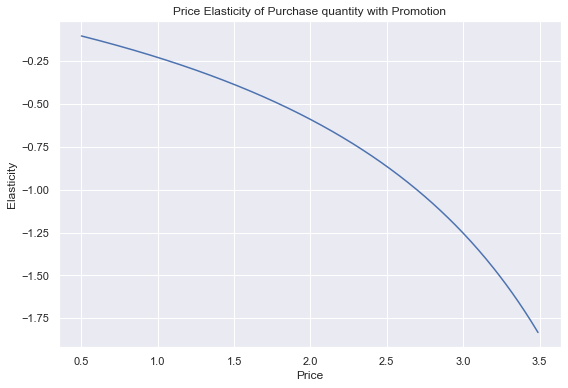

In [34]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase quantity with Promotion')
plt.show()

### Without Promotion

In [35]:
df_price_elasticity_quantity2 = pd.DataFrame(index=np.arange(price_range.size))
df_price_elasticity_quantity2['Price_Incidence'] = price_range
df_price_elasticity_quantity2['Promotion_Incidence'] = 0

In [36]:
predict_quantity_no_promo = model_quantity.predict(df_price_elasticity_quantity2)

In [37]:
price_elasticity_quantity_promotion_no = beta_quantity * price_range/predict_quantity_no_promo

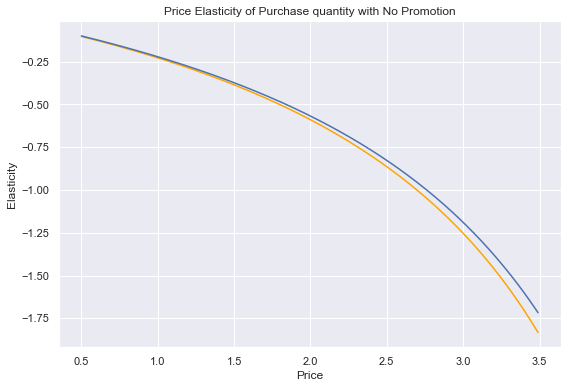

In [38]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color='orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase quantity with No Promotion')
plt.show()

## From Career focused group

In [39]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence','Segment']]

In [40]:
Y = df_purchase_quantity['Quantity']

In [41]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [42]:
model_quantity.coef_

array([-0.83348663, -0.07038789, -0.1920494 ])

In [43]:
df_price_elasticity_quantity = pd.DataFrame(index=np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1
df_price_elasticity_quantity['Segment'] = 2

In [44]:
beta_quantity = model_quantity.coef_[0]

In [45]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity) 

In [46]:
price_elasticity_quantity_promotion_yes_career = beta_quantity * price_range/predict_quantity

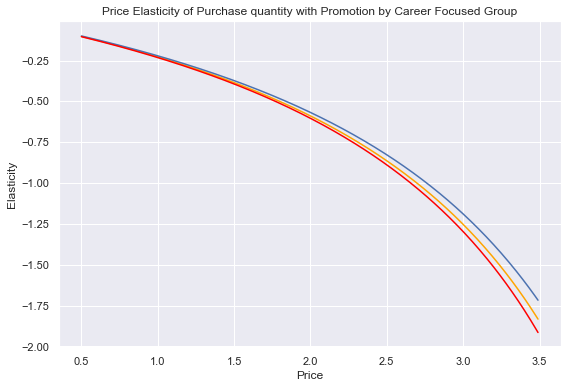

In [47]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color='orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.plot(price_range, price_elasticity_quantity_promotion_yes_career, color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase quantity with Promotion by Career Focused Group')
plt.show()